## 🧮 Solving a Nonstiff System of ODEs with `solve_ivp`

We solve the following system of first-order differential equations:

$$
\begin{aligned}
\frac{dx_1}{dt} &= -2x_1^2 + 2x_1 + x_2 - 1 \quad \text{with} \quad x_1(0) = 2 \\
\frac{dx_2}{dt} &= -x_1 - 3x_2^2 + 2x_2 + 2 \quad \text{with} \quad x_2(0) = 0
\end{aligned}
$$

This system is nonlinear but nonstiff, so we use the default Runge–Kutta method (`RK45`) via `scipy.integrate.solve_ivp`.

We will:
- Define the system as a Python function
- Solve it over a time interval $t \in [0, 5]$
- Plot both time trajectories and the phase portrait
- Include solver diagnostics for transparency

**Reference**
- David Clough, Matlab Bootcamp, 2024

## 🧠 Code Cell 1: Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


## 🧩 Code Cell 2: Define the system of ODEs

In [2]:
def rhs(t, x):
    x1, x2 = x
    dx1 = -2 * x1**2 + 2 * x1 + x2 - 1
    dx2 = -x1 - 3 * x2**2 + 2 * x2 + 2
    return [dx1, dx2]


## 🧾 Code Cell 3: Initial Conditions and Time Grid

In [3]:
# 🧾 Initial conditions and time span
x0 = [2.0, 0.0]         # x1(0) = 2, x2(0) = 0
t0, tf = 0.0, 5.0       # Time interval
t_eval = np.linspace(t0, tf, 501)  # Dense output grid


## 🚀 Code Cell 4: Solve the IVP

In [4]:
# 🚀 Solve the system using RK45
sol = solve_ivp(
    fun=rhs,
    t_span=(t0, tf),
    y0=x0,
    method='RK45',
    t_eval=t_eval,
    rtol=1e-8,
    atol=1e-10,
)


## 📊 Code Cell 5: Solver Diagnostics

In [5]:
# 📊 Print solver diagnostics
print("Solver diagnostics:")
print(f"  Success       : {sol.success}")
print(f"  Message       : {sol.message}")
print(f"  Function evals: {sol.nfev}")
print(f"  Time steps    : {len(sol.t)}")


Solver diagnostics:
  Success       : True
  Message       : The solver successfully reached the end of the integration interval.
  Function evals: 452
  Time steps    : 501


## 📈 Code Cell 6: Plot Time Trajectories

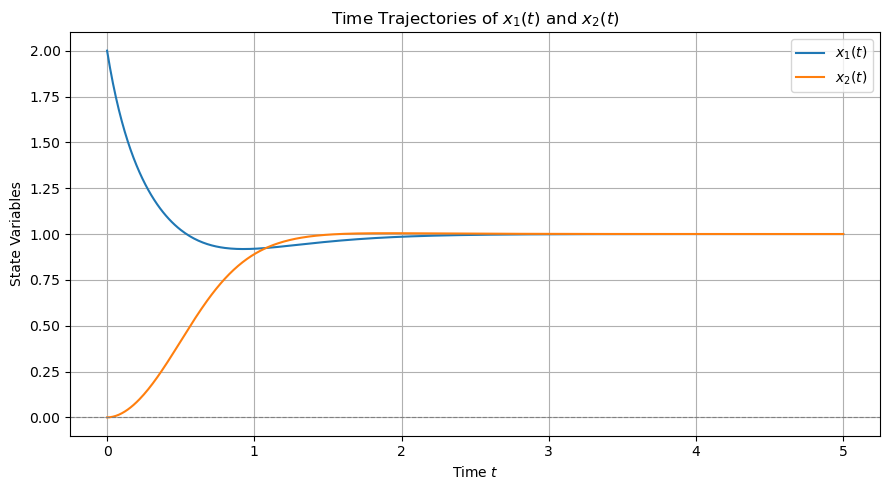

In [6]:
# Plot x1(t) and x2(t)
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]

plt.figure(figsize=(9, 5))
plt.plot(t, x1, label='$x_1(t)$', color='tab:blue')
plt.plot(t, x2, label='$x_2(t)$', color='tab:orange')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.xlabel('Time $t$')
plt.ylabel('State Variables')
plt.title('Time Trajectories of $x_1(t)$ and $x_2(t)$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 🌀 Code Cell 7: Phase Portrait

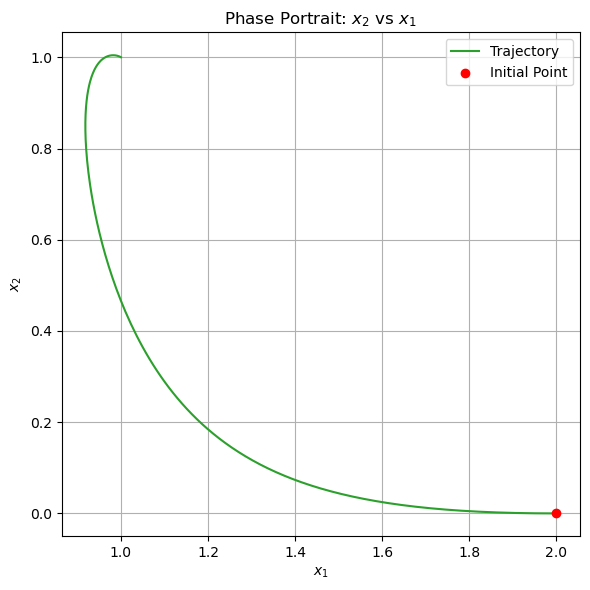

In [7]:
# Plot phase portrait: x2 vs x1
plt.figure(figsize=(6, 6))
plt.plot(x1, x2, color='tab:green', label='Trajectory')
plt.scatter([x1[0]], [x2[0]], color='red', label='Initial Point', zorder=3)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait: $x_2$ vs $x_1$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
